## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [3]:
#https://www.geeksforgeeks.org/delete-duplicates-in-a-pandas-dataframe-based-on-two-columns/
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
var1 = study_data_complete.groupby(["Mouse ID", "Timepoint"]).first() 

study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])

study_data_complete.loc[study_data_complete.duplicated(), :]
var1

Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                
a203     0            Infubinol  Female          20          23   
         5            Infubinol  Female          20          23   
         10           Infubinol  Female          20          23   
         15           Infubinol  Female          20          23   
         20           Infubinol  Female          20          23   
...                         ...     ...         ...         ...   
z969     25            Naftisol    Male           9          30   
         30            Naftisol    Male           9          30   
         35            Naftisol    Male           9          30   
         40            Naftisol    Male           9          30   
         45            Naftisol    Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                   45.000000                 0  
         5                   48.508468                 0  
         10                  51.852437                 1  
         15                  52.777870                 1  
         20                  55.173336                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1888 rows x 6 columns]

In [4]:
#https://www.geeksforgeeks.org/how-to-select-rows-from-a-dataframe-based-on-column-values/
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
# Optional: Get all the data for the duplicate mouse ID. 



df_new = study_data_complete[study_data_complete['Mouse ID'] == 'g989']
df_new

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = study_data_complete["Mouse ID"] != 'g989'
df25 = study_data_complete.loc[mask,:]

In [6]:
# Checking the number of mice in the clean DataFrame.
df25["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summ1 = df25.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summ2 = df25.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summ3 = df25.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summ4 = df25.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summ5 = df25.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

df = pd.DataFrame(columns = ['Mean'])
df = pd.DataFrame(columns = ['Median'])
df = pd.DataFrame(columns = ['Variance'])
df = pd.DataFrame(columns = ['Standard Deviation'])
df = pd.DataFrame(columns = ['SEM'])

df['Mean'] = summ1
df['Median'] = summ2
df['Variance'] = summ3
df['Standard Deviation'] = summ4
df['SEM'] = summ5
df2 = df[["Mean","Median","Variance","Standard Deviation","SEM"]]
df2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summ1a = df25.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summ1a


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
#https://www.kite.com/python/answers/how-to-get-row-names-from-a-pandas-dataframe-in-python

index = summ1a. index
a_list = list(index)


var2 = df25.groupby(["Mouse ID"]).first() 
summ1b = var2.groupby(["Mouse ID"]).agg({"Timepoint":"max"})


summ1c = var2.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].sum()
var5 = study_data_complete.groupby(["Drug Regimen"]).agg({"Timepoint":"count"})
var5

col_one_list = var5['Timepoint'].tolist()
col_one_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

## Bar and Pie Charts

<Figure size 1080x720 with 0 Axes>

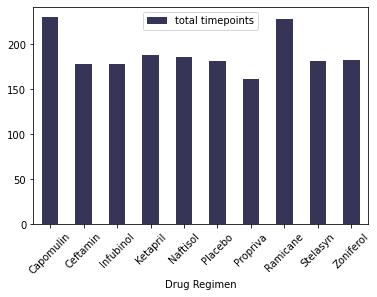

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.figure(figsize=(15,10))
df = pd.DataFrame({'Drug Regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 'total timepoints':[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]})
ax = df.plot.bar(x='Drug Regimen', y='total timepoints', rot=45, color = "#363457")

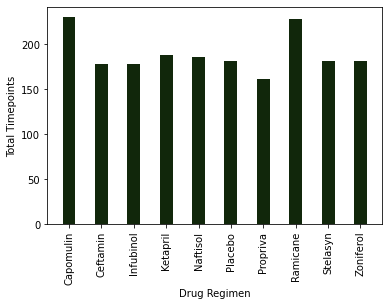

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
y_axis = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
plt.bar(x_axis, y_axis, color ='#11270B',
        width = 0.4)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(x_axis, rotation='vertical')
plt.show()

In [12]:
df5 = df25.groupby(["Sex"]).agg({"Sex":"count"})
df5

df6 = pd.DataFrame(df5, columns = ['Sex'])
df6

,Sex
Sex,
Female,922
Male,958


<AxesSubplot:ylabel='Sex'>

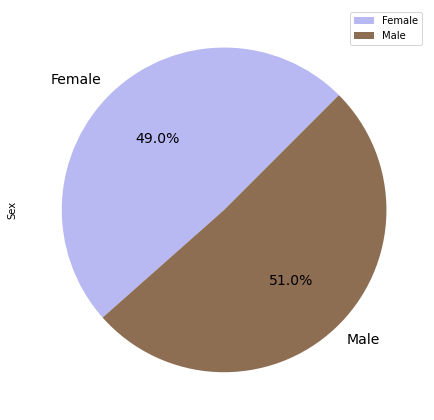

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df6.plot(kind='pie', y = 'Sex', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=["Female","Male"], legend = True, fontsize=14, colors = {"#B8B8F3","#8E6E53"})

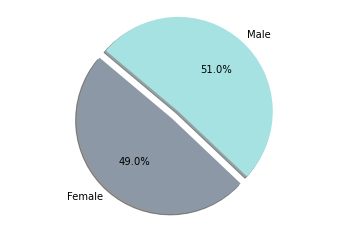

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female","Male"]
count = [922,958]
colors = ["#8D98A7","#A7E2E3"]
explode = (0,0.1)
plt.pie(count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

var10 = df25.groupby(["Mouse ID"]).agg({"Timepoint":"max"})

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(var10, df25, on=["Mouse ID","Timepoint"], how= "left")
merge_df
# var11 = merge_df.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":"max"})
# var11


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [87]:
#create a list that holds the treatment names
list1 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#second, empty list that will hold the tumor volume data.
tumor_vol = []
#Loop through each drug in the treatment list
for drug in list1:
    print(drug)
#locating the rows in the merged DataFrame that correspond to each treatment
for i in range(len(merge_df)):
     
    x = merge_df.loc[i, "Drug Regimen"], merge_df.loc[i, "Tumor Volume (mm3)"]
    tumor_vol.append(x)
type(tumor_vol)
dfa = pd.DataFrame(tumor_vol)
dfa
mask30 = (dfa[0] == "Capomulin") 
dfb = dfa.loc[mask30,:]
dfb.reset_index(drop=True, inplace=True)
dfb.columns =['Drug Regimen', "Tumor Volume (mm3)"]
dfb

mask30 = (dfa[0] == "Ramicane")
dfc = dfa.loc[mask30,:]
dfc.reset_index(drop=True, inplace=True)
dfc.columns =['Drug Regimen', "Tumor Volume (mm3)"]
dfc

mask30 = (dfa[0] == "Infubinol")
dfd = dfa.loc[mask30,:]
dfd.reset_index(drop=True, inplace=True)
dfd.columns =['Drug Regimen', "Tumor Volume (mm3)"]
dfd

mask30 = (dfa[0] == "Ceftamin")
dfe = dfa.loc[mask30,:]
dfe.reset_index(drop=True, inplace=True)
dfe.columns =['Drug Regimen', "Tumor Volume (mm3)"]
dfe
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
Q3a = np.quantile(dfb["Tumor Volume (mm3)"], 0.75)
Q1a = np.quantile(dfb["Tumor Volume (mm3)"], 0.25)
IQRa = Q3a-Q1a
lower_range_a = Q1a - 1.5 * IQRa
upper_range_a = Q3a + 1.5 * IQRa

Q3b = np.quantile(dfc["Tumor Volume (mm3)"], 0.75)
Q1b = np.quantile(dfc["Tumor Volume (mm3)"], 0.25)
IQRb = Q3b-Q1b
lower_range_b = Q1b - 1.5 * IQRb
upper_range_b = Q3b + 1.5 * IQRb

Q3c = np.quantile(dfd["Tumor Volume (mm3)"], 0.75)
Q1c = np.quantile(dfd["Tumor Volume (mm3)"], 0.25)
IQRc = Q3c-Q1c
lower_range_c = Q1c - 1.5 * IQRc
upper_range_c = Q3c + 1.5 * IQRc

Q3d = np.quantile(dfe["Tumor Volume (mm3)"], 0.75)
Q1d = np.quantile(dfe["Tumor Volume (mm3)"], 0.25)
IQRd = Q3d-Q1d
lower_range_d = Q1d - 1.5 * IQRd
upper_range_d = Q3d + 1.5 * IQRd

#Append the resulting final tumor volumes for each drug to the empty list. 

maskc = (dfb["Drug Regimen"] == "Capomulin" ) & ((dfb["Tumor Volume (mm3)"] < lower_range_a) | (dfb["Tumor Volume (mm3)"] > upper_range_a))
outliers_a = dfb.loc[maskc]

outliers_a

maskd = (dfc["Drug Regimen"] == "Ramicane" ) & ((dfc["Tumor Volume (mm3)"] < lower_range_b) | (dfc["Tumor Volume (mm3)"] > upper_range_b))
outliers_b = dfc.loc[maskd]

outliers_b

maske = (dfd["Drug Regimen"] == "Infubinol" ) & ((dfd["Tumor Volume (mm3)"] < lower_range_c) | (dfd["Tumor Volume (mm3)"] > upper_range_c))
outliers_c = dfd.loc[maske,:]

outliers_c

maskf = (dfe["Drug Regimen"] == "Ceftamin" ) & ((dfe["Tumor Volume (mm3)"] < lower_range_d) | (dfe["Tumor Volume (mm3)"] > upper_range_d))
outliers_d = dfe.loc[maskf]

outliers_d

outliers_c



Capomulin
Ramicane
Infubinol
Ceftamin


,Drug Regimen,Tumor Volume (mm3)
5,Infubinol,36.321346


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

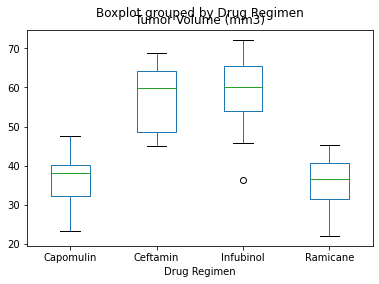

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
list_of_dataframes = [dfb, dfc, dfd,dfe]
dfm = pd.concat(list_of_dataframes)



dfm.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)


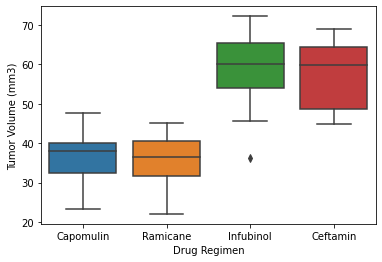

In [84]:
ax = sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=dfm)

## Line and Scatter Plots

In [20]:
df45 = df25[df25['Mouse ID'] == 'k403']
x_values = df45["Timepoint"]
y_values = df45['Tumor Volume (mm3)']
x2 = x_values.tolist()
y2 = y_values.tolist()
y2

[45.0,
 38.82589807,
 35.01427146,
 34.22399174,
 32.99772858,
 33.46457735,
 31.09949753,
 26.54699343,
 24.36550471,
 22.05012627]

In [21]:
df55 = pd.DataFrame(list(zip(x2, y2)),
               columns =['Timepoint', 'Tumor Volume (mm3)'])
df55

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,38.825898
2,10,35.014271
3,15,34.223992
4,20,32.997729
5,25,33.464577
6,30,31.099498
7,35,26.546993
8,40,24.365505
9,45,22.050126


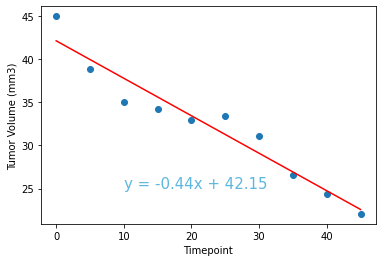

In [88]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x3 = df55["Timepoint"]
y3 = df55["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3, y3)
regress_values = x3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3,y3)
plt.plot(x3,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="#5DB7DE")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


df95 = df25.groupby(["Drug Regimen","Weight (g)"]).agg({"Tumor Volume (mm3)":"mean"})
df95.reset_index(inplace=True)
df95

df98 = df95[df95['Drug Regimen'] == 'Capomulin']
df98
# df95.columns = list(["Weight (g)","Tumor Volume (mm3)","index" ])
# df96 = df95.pivot(index="index", columns="Weight (g)", values="Tumor Volume (mm3)")
# print(df96)

,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,Capomulin,15,36.182040
1,Capomulin,17,37.214133
2,Capomulin,19,41.182391
3,Capomulin,20,39.141053
4,Capomulin,21,42.088700
5,Capomulin,22,43.288490
6,Capomulin,23,43.341051
7,Capomulin,24,44.805810
8,Capomulin,25,44.062109


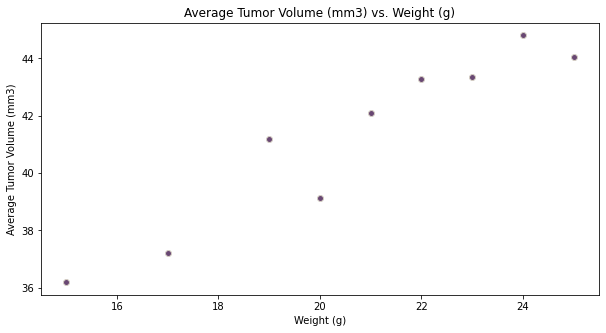

In [101]:
plt.figure(figsize=(10,5))


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(df98["Weight (g)"], df98["Tumor Volume (mm3)"], marker="o", facecolors="#694873", edgecolors="#D4CDC3", alpha=1.0)


# Give our chart some labels and a tile
plt.title("Average Tumor Volume (mm3) vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Prints the scatter plot to the screen
plt.show()

## Correlation and Regression

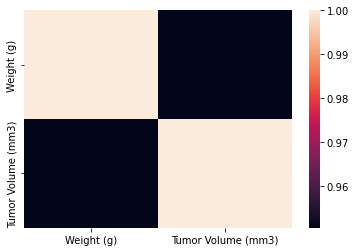

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrs = df98.corr()
sns.heatmap(corrs)
plt.show()

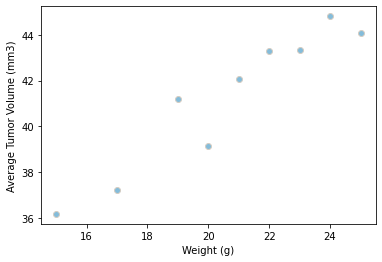

In [103]:
x5 = df98["Weight (g)"] 
y5 = df98["Tumor Volume (mm3)"]
plt.scatter(x5,y5, marker="o", facecolors="#84BCDA", edgecolors="#D4CDC3", alpha=1.0)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x5, y5)
linregress(x5, y5)
preds = x5 * slope + intercept

preds

0    36.185819
1    37.975364
2    39.764910
3    40.659682
4    41.554455
5    42.449227
6    43.344000
7    44.238773
8    45.133545
Name: Weight (g), dtype: float64

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_10716/1870992811.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x10,regress_values,"r-", color = "#6E75A8")


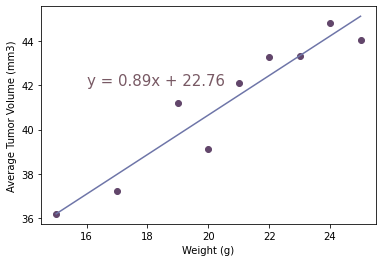

In [107]:
x10 = df98["Weight (g)"] 
y10 = df98["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x10, y10)
regress_values = x10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x10,y10,facecolors="#62466B", edgecolors="#62466B", alpha=1.0)
plt.plot(x10,regress_values,"r-", color = "#6E75A8")
plt.annotate(line_eq,(16,42),fontsize=15,color="#785964")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

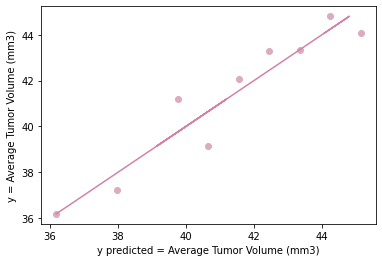

In [110]:
plt.scatter(preds, y10, facecolors="#DBABBE", edgecolors="#DBABBE", alpha=1.0)
plt.plot(y10, y10, color="#D282A6")
plt.xlabel('y predicted = Average Tumor Volume (mm3)')
plt.ylabel('y = Average Tumor Volume (mm3)')
plt.show()

In [58]:
import statsmodels.api as sm

X20 = df98["Weight (g)"] 
X20 = sm.add_constant(X20) # adding a constant

y20 = df98["Tumor Volume (mm3)"]

model = sm.OLS(y20, X20).fit()
predictions = model.predict(X20) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           8.45e-05
Time:                        13:32:47   Log-Likelihood:                -11.862
No. Observations:                   9   AIC:                             27.72
Df Residuals:                       7   BIC:                             28.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7642      2.310      9.856      0.0

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\samslomowitz\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
